# Grading

The project contains analysis of job outcomes of the student who graduated from college beteen 2010 and 2012. Dataset used in the project comes from https://github.com/fivethirtyeight/data/tree/master/college-majors.

Rows represent a different majors in college. There is information like gender diversity, employment rates, median  and so on.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
recent_grads = pd.read_csv("recent-grads.csv")

In [19]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [5]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna(axis=0)
cleaned_data_count =  recent_grads.shape[0]
print("Raw data contained {} rows, after removed rows with null values there is {} rows"
      .format(raw_data_count,cleaned_data_count))

Raw data contained 173 rows, after removed rows with null values there is 172 rows


## Scatter plots

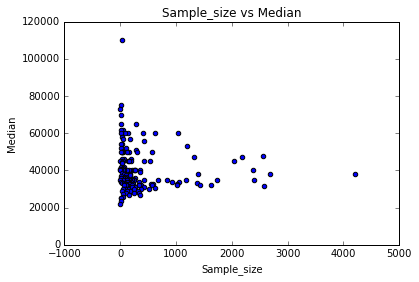

In [8]:
recent_grads.plot(x="Sample_size",y="Median",kind="Scatter",title="Sample_size vs Median")

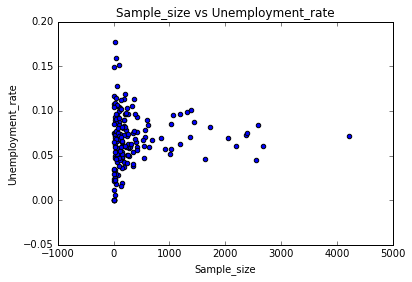

In [9]:
recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="Scatter",title="Sample_size vs Unemployment_rate")

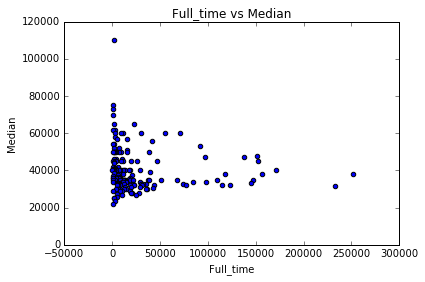

In [10]:
recent_grads.plot(x="Full_time",y="Median",kind="Scatter",title="Full_time vs Median")

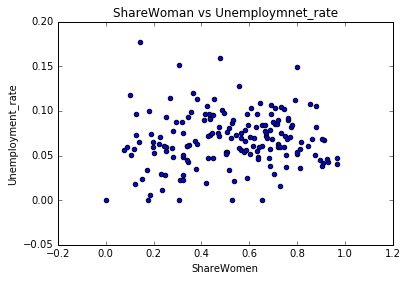

In [11]:
recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="Scatter",title="ShareWoman vs Unemploymnet_rate")

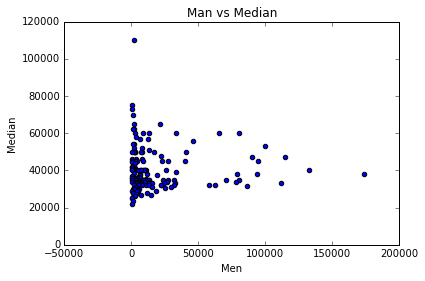

In [12]:
recent_grads.plot(x="Men",y="Median",kind="Scatter",title="Man vs Median")

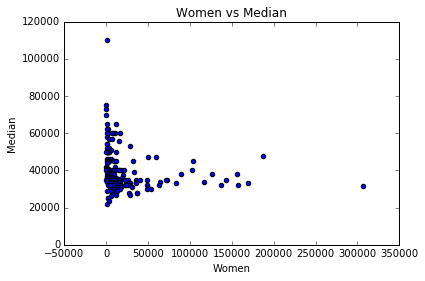

In [13]:
recent_grads.plot(x="Women",y="Median",kind="Scatter",title="Women vs Median")

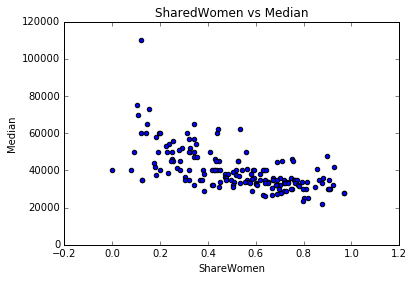

In [16]:
recent_grads.plot(x="ShareWomen",y="Median",kind="Scatter",title="SharedWomen vs Median")

More popular majors does not seem to make money. Rare majors has a wider range median. What more some very rare majors has very high media and also the lowest. There is noticable one peak median for one major. This is PETROLEUM ENGINEERING. Those students makes much more money than any other majors. The change beetween runner-up is very visible.

It seems that subjects with the majority of women does make less money.

There is no pariticular link between the number of full-time employees and median salary. At first glance it looks that the more employee who are working full-time means less median, but if we look at the Sample_size vs median chart it looks very similiar to this one, so it looks that most people from particular major work in full-time.

## Histograms

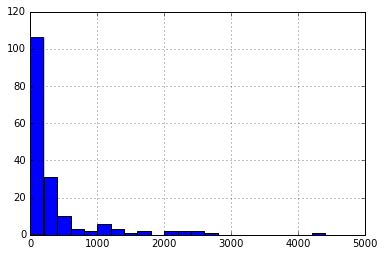

In [30]:
recent_grads["Sample_size"].hist(bins=25,range=(0,5000))

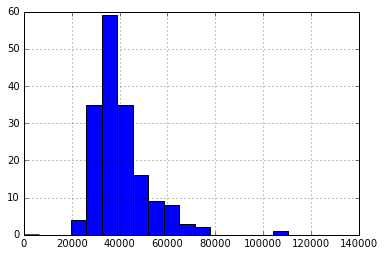

In [31]:
recent_grads["Median"].hist(bins=20,range=(0,130000))

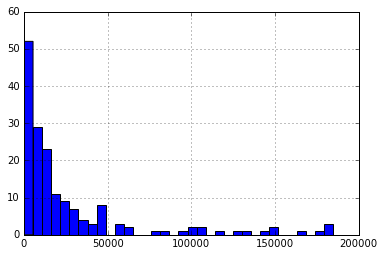

In [35]:
recent_grads["Employed"].hist(bins=35,range=(0,190000))

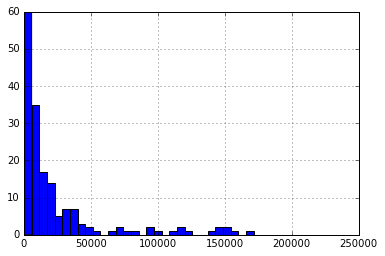

In [38]:
recent_grads["Full_time"].hist(bins=35,range=(0,200000))

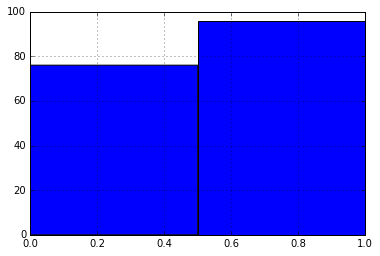

In [58]:
recent_grads["ShareWomen"].hist(bins=2,range=(0,1))

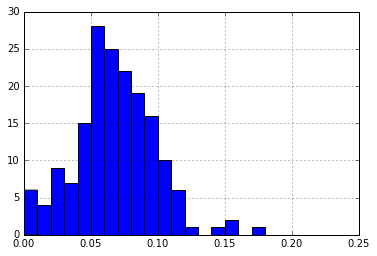

In [46]:
recent_grads["Unemployment_rate"].hist(bins=25,range=(0,0.25))

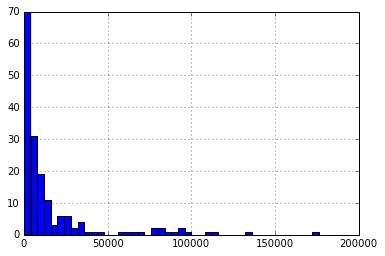

In [54]:
recent_grads["Men"].hist(bins=50,range=(0,200000))

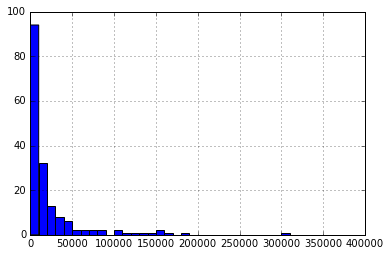

In [56]:
recent_grads["Women"].hist(bins=40,range=(0,400000))

Outcomes:
About 77 out of 172 (~44%) majors are predominantly man and abou 95 out of 172 (~56) are predominantly women

Most common median salary range is about 25,000 to 50,000

## Scatter matrix plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8324a98a58>,
      dtype=object)

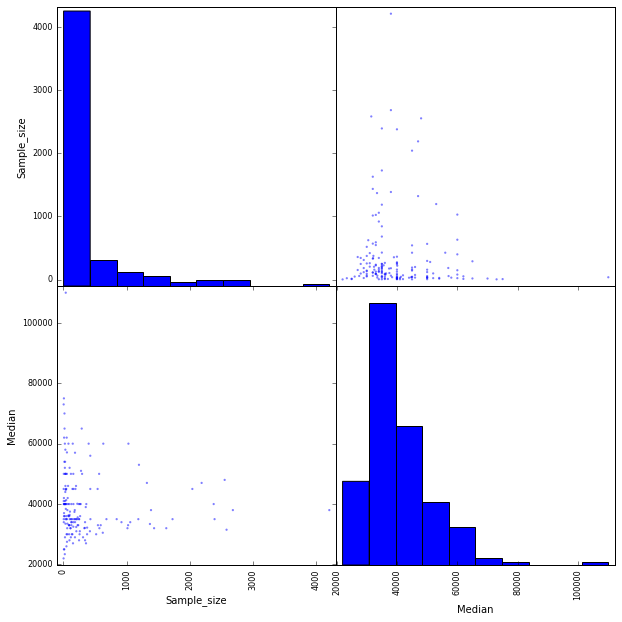

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83248dd4a8>,
      dtype=object)

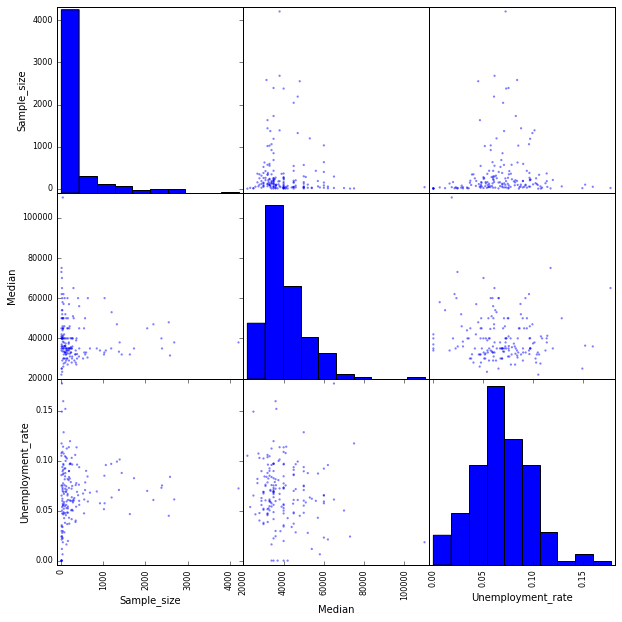

In [66]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(10,10))

More popular majors has similiar properties between each other. It means that for example majors with sample_size always landed in the same histogram's bins (both for median and unemployment rate). Less popular subjects has more variety and those causes the "wings" in median and unemployment_rate histograms.

There is a correlation beeween median unemployment_rate. It seems that majors with the lower median has higher unemployment_rate

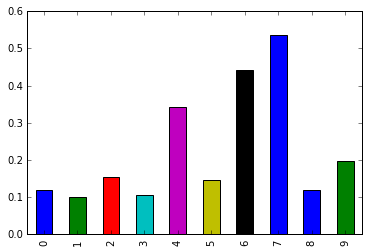

In [69]:
recent_grads[:10]["ShareWomen"].plot(kind='bar')

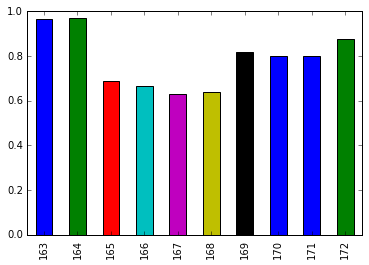

In [68]:
recent_grads[-10:]["ShareWomen"].plot(kind='bar')

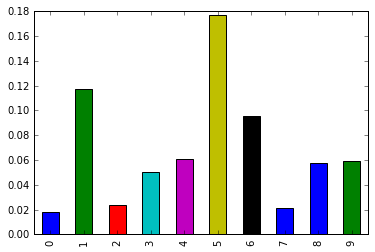

In [70]:
recent_grads[:10]["Unemployment_rate"].plot(kind='bar')

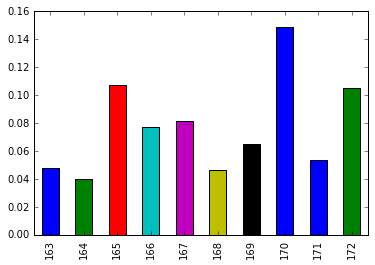

In [71]:
recent_grads[-10:]["Unemployment_rate"].plot(kind='bar')

The top-10 majors are predominantly by men. From those 10 there is only one shared half by half by women. In all majors from last places majority are women.

The majors with lower rank has slighly higher unemployment_rate in comparison to top rank majorities.


In [104]:
dist_category = recent_grads["Major_category"].value_counts()
category_men = {}
category_women = {}
for cat in dist_category.index:
    nr_men_category = recent_grads[recent_grads["Major_category"]==cat]["Men"].sum()
    category_men[cat] = nr_men_category
    
    nr_women_category = recent_grads[recent_grads["Major_category"]==cat]["Women"].sum()
    category_women[cat] = nr_women_category
    
m_category_series = pd.Series(category_men)
print(m_category_series)
w_category_series = pd.Series(category_women)

gender_category = pd.DataFrame(m_category_series,columns=["nr_men"])
gender_category["nr_women"] = w_category_series

gender_category



Agriculture & Natural Resources         40357.0
Arts                                   134390.0
Biology & Life Science                 184919.0
Business                               667852.0
Communications & Journalism            131921.0
Computers & Mathematics                208725.0
Education                              103526.0
Engineering                            408307.0
Health                                  75517.0
Humanities & Liberal Arts              272846.0
Industrial Arts & Consumer Services    103781.0
Interdisciplinary                        2817.0
Law & Public Policy                     91129.0
Physical Sciences                       95390.0
Psychology & Social Work                98115.0
Social Science                         256834.0
dtype: float64


,nr_men,nr_women
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0
Humanities & Liberal Arts,272846.0,440622.0


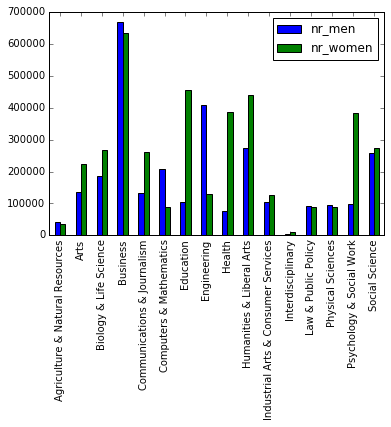

In [106]:
gender_category.plot(kind="bar")

There is much more women in education, health, psychological work. Mens  choose the computer, math engineering subjects often than woman